## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

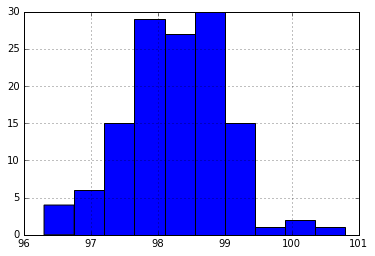

In [3]:
%matplotlib inline
tempHist = df['temperature'].hist()

(1) Yes, the histogram looks like a normal distribution.

In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


(2) The hypotheses we are testing is "Is the true population 98.6 degrees".  Assuming the hypothesis is true, lets figure the probability that a sample of 130 measurements has a mean of 98.2.  Since the number of samples is large, it is reasonable to use the z-test with variance equal to the sample variance.  Thus the hypotheses is that the population has distribution N(98.2, 0.733^2).  Z-score of this 130 sample is (98.6-98.2) / (0.733 / sqrt(130)) = 6.22

In [5]:
pow(130,0.5)*(98.6-98.2)/0.733

6.221966849108396

That is a high z-score.  The hypotheses is very likely to be false.  The t-test would give nearly the same result because the sample size is large.

(3) We will call someone's tempurature abnormal if it is outside the 95 percent confidence interval.  That interal is [98.2 - 2 * 0.73, 98.2 + 2 * 0.73] = [96.7, 99.7]

In [6]:
df[df.gender=='M'].describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [7]:
df[df.gender=='F'].describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


(4) Given the hythosese that there is no difference between the mean temperature of men and woman, the difference of the two samples would be a random variable of N(0, (0.73)^2/65 + (0.73)^2/65) = N(0, 0.016)

In [8]:
2*pow(0.73,2)/65 

0.016396923076923076

In [9]:
2*(98.3-98.1)/(pow(0.016,0.5))

3.1622776601684244

A z-score of 3.16 indicates the difference in the two samples was very unlikely to happen by chance and means there is very likely a real differnece between the average male and female temperatures in the population.